In [1]:
import gzip
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

In [2]:
Muon_Geo = [-5732.0000, -3170.0000]

In [3]:
x_lims = [-3,3]
y_lims = [-5,5]

In [4]:
inputs_file = '/Users/luisfelipe/Documents/Projects/fairship_simulation/samples/subsample.pkl'
with gzip.open(inputs_file, 'rb') as f:
    inputs = pickle.load(f)
px_input,py_input,pz_input,x_input,y_input,z_input,charge_input = inputs.T

outputs_file = '../outputs/outputs_geant4.pkl'
with gzip.open(outputs_file, 'rb') as f:
    outputs = pickle.load(f)
px,py,pz,x,y,z,charge = outputs.T

outputs_fs = '../outputs/outputs_fairship.pkl'
with gzip.open(outputs_fs, 'rb') as f:
    outputs_fs = pickle.load(f)
px_fs_start,py_fs_start,pz_fs_start,x_start,y_start,z_start,pdg,x_fs,y_fs,z_fs,px_fs,py_fs,pz_fs = outputs_fs.T

In [5]:
pt_input = np.sqrt(px_input**2+py_input**2)
P_input = np.sqrt(pt_input**2+pz_input**2)

pt = np.sqrt(px**2+py**2)
P = np.sqrt(pt**2+pz**2)

pt_fs = np.sqrt(px_fs**2+py_fs**2)
p_fs = np.sqrt(pt_fs**2+pz_fs**2)
pt_fs_start = np.sqrt(px_fs_start**2+py_fs_start**2)
p_fs_start = np.sqrt(pt_fs_start**2+pz_fs_start**2)

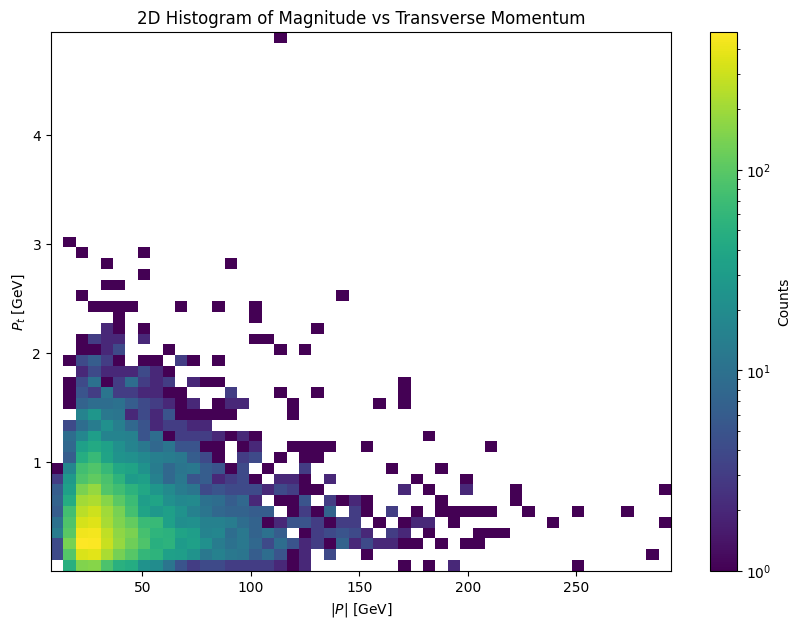

In [6]:
plt.figure(figsize=(10, 7))
plt.hist2d(p_fs_start, pt_fs_start, bins=50, cmap='viridis', norm=LogNorm())

# Add color bar
plt.colorbar(label='Counts')

# Add labels and title
plt.xlabel('$|P|$ [GeV]')
plt.ylabel('$P_t$ [GeV]')
plt.title('2D Histogram of Magnitude vs Transverse Momentum')

# Show plot
plt.show()

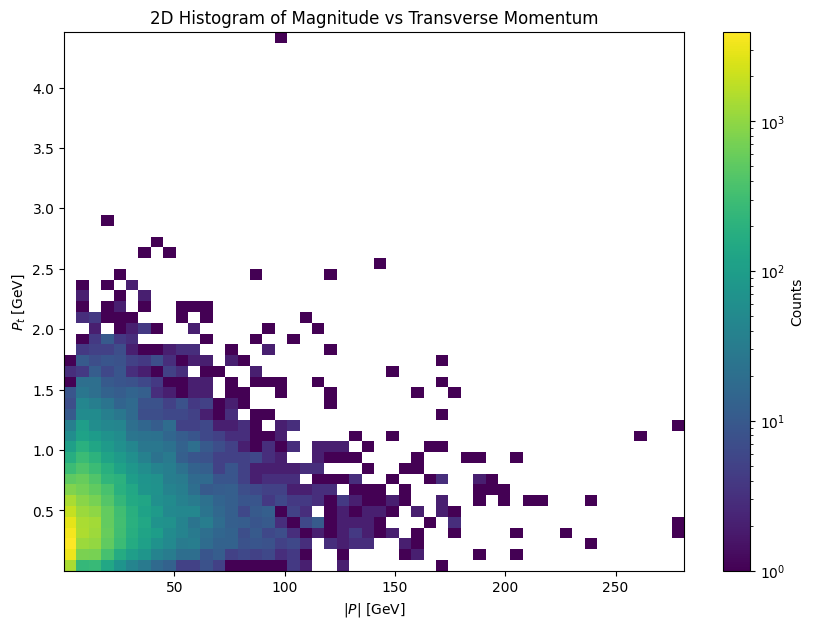

In [7]:
plt.figure(figsize=(10, 7))
plt.hist2d(P_input, pt_input, bins=50, cmap='viridis', norm=LogNorm())

# Add color bar
plt.colorbar(label='Counts')

# Add labels and title
plt.xlabel('$|P|$ [GeV]')
plt.ylabel('$P_t$ [GeV]')
plt.title('2D Histogram of Magnitude vs Transverse Momentum')

# Show plot
plt.show()

In [8]:
mask_x = np.logical_and(x<3, x>-3)
mask_y = np.logical_and(y<5,y>-5)
mask = np.logical_and(mask_x,mask_y)

mask_x = np.logical_and(x_fs<300, x_fs>-300)
mask_y = np.logical_and(y_fs<500,y_fs>-500)
mask_fs = np.logical_and(mask_x,mask_y)

In [9]:
mask.sum()

np.int64(7440)

In [23]:
mask_fs.sum()

np.int64(9438)

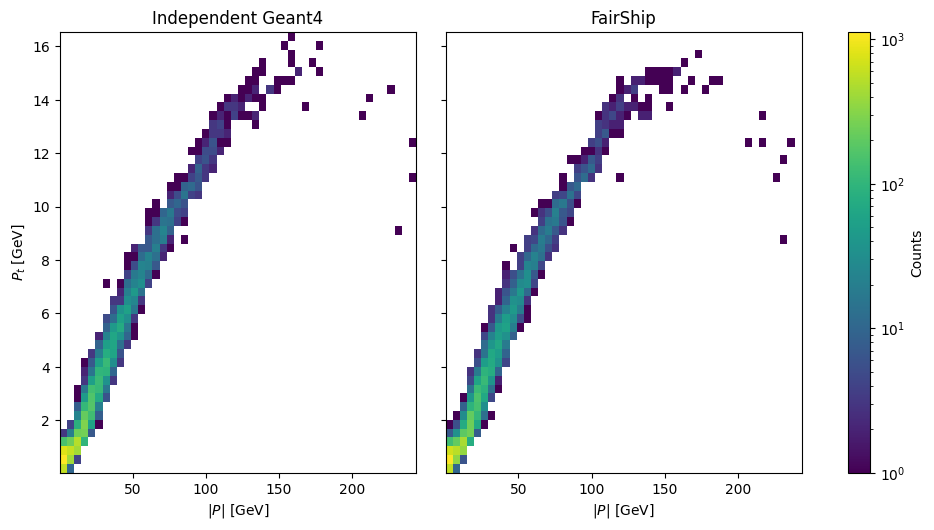

In [10]:
fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
fig.tight_layout()
h1, xedges, yedges, im1 = axes[0].hist2d(P, pt, bins=50, cmap='viridis', norm=LogNorm())
axes[0].set_xlabel('$|P|$ [GeV]')
axes[0].set_ylabel('$P_t$ [GeV]')
axes[0].set_title('Independent Geant4')

axes[1].hist2d(p_fs, pt_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm())
axes[1].set_xlabel('$|P|$ [GeV]')
axes[1].set_title('FairShip')


fig.colorbar(im1, ax=axes,label='Counts')
plt.show()

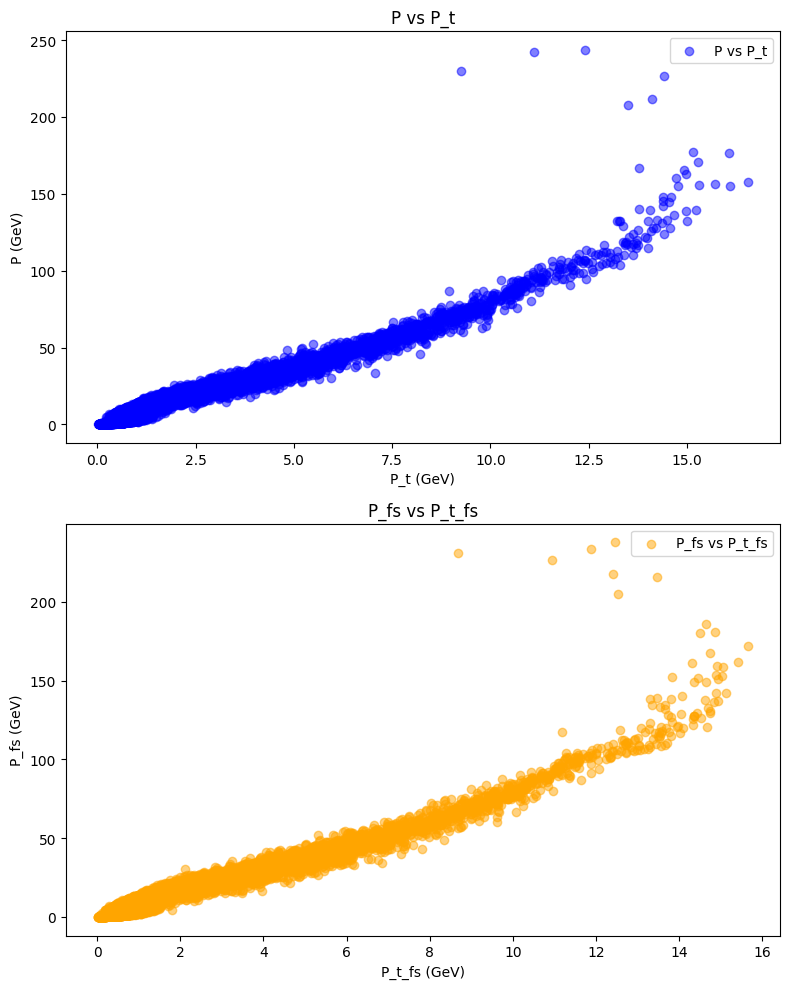

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot P vs P_t
ax[0].scatter(pt, P, alpha=0.5, label='P vs P_t', color='blue')
ax[0].set_xlabel('P_t (GeV)')
ax[0].set_ylabel('P (GeV)')
ax[0].set_title('P vs P_t')
ax[0].legend()

# Plot P_fs vs P_t_fs
ax[1].scatter(pt_fs, p_fs, alpha=0.5, label='P_fs vs P_t_fs', color='orange')
ax[1].set_xlabel('P_t_fs (GeV)')
ax[1].set_ylabel('P_fs (GeV)')
ax[1].set_title('P_fs vs P_t_fs')
ax[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [13]:
P[np.logical_and(pt<4,pt>2)].mean() - p_fs[np.logical_and(pt_fs<4,pt_fs>2)].mean()

np.float64(0.1402682223956795)

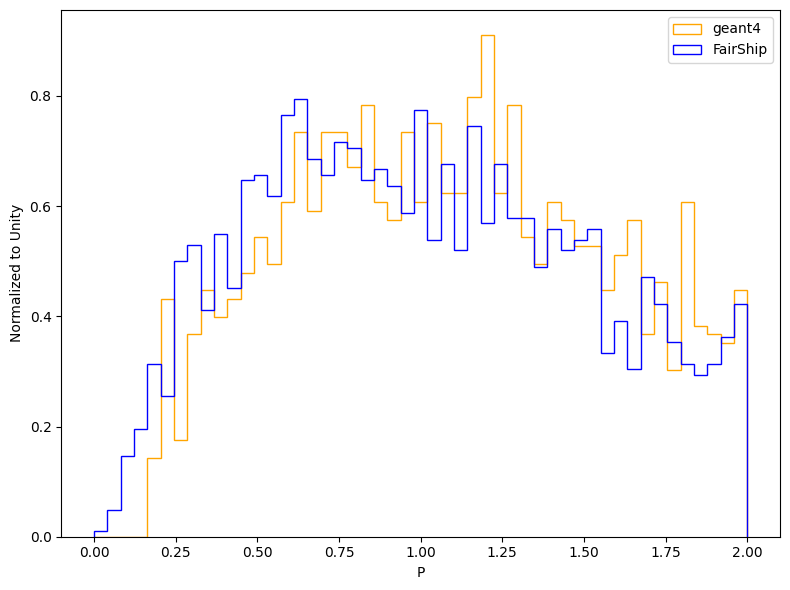

In [25]:

ratio = P 
ratio_fs = p_fs

# Create the figure
plt.figure(figsize=(8, 6))

# Define bins for the histogram
bins = np.linspace(0, 2, 50)

# Plot the histograms for both ratios (normalized)
plt.hist(ratio, bins=bins, density=True, histtype='step', label='geant4', color='orange')
plt.hist(ratio_fs, bins=bins, density=True, histtype='step', label='FairShip', color='blue')

# Add labels and legend
plt.xlabel('P')
plt.ylabel('Normalized to Unity')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

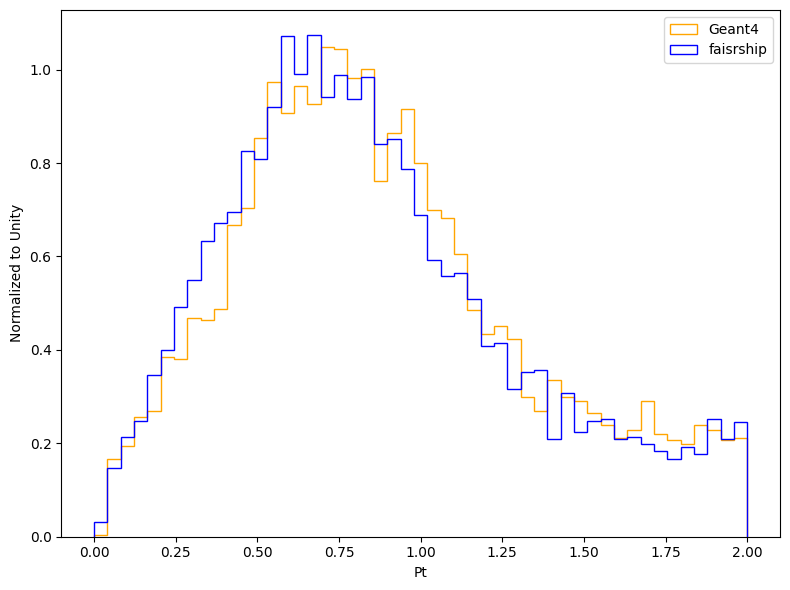

In [15]:


# Calculate the ratios
ratio = pt
ratio_fs = pt_fs

# Create the figure
plt.figure(figsize=(8, 6))

# Define bins for the histogram
bins = np.linspace(0, 2, 50)

# Plot the histograms for both ratios (normalized)
plt.hist(ratio, bins=bins, density=True, histtype='step', label='Geant4', color='orange')
plt.hist(ratio_fs, bins=bins, density=True, histtype='step', label='faisrship', color='blue')

# Add labels and legend
plt.xlabel('Pt')
plt.ylabel('Normalized to Unity')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

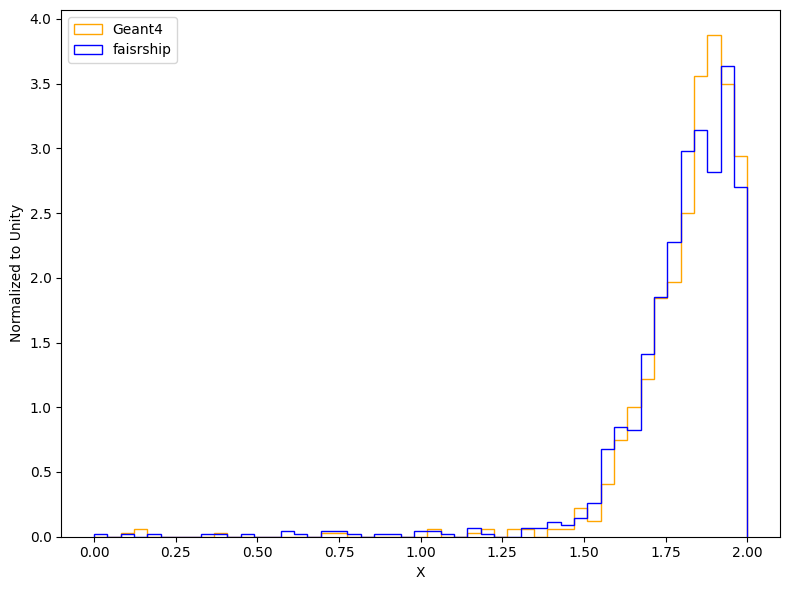

In [24]:
plt.figure(figsize=(8, 6))

# Define bins for the histogram
bins = np.linspace(0, 2, 50)

# Plot the histograms for both ratios (normalized)
plt.hist(x, bins=bins, density=True, histtype='step', label='Geant4', color='orange')
plt.hist(x_fs/100, bins=bins, density=True, histtype='step', label='faisrship', color='blue')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Normalized to Unity')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

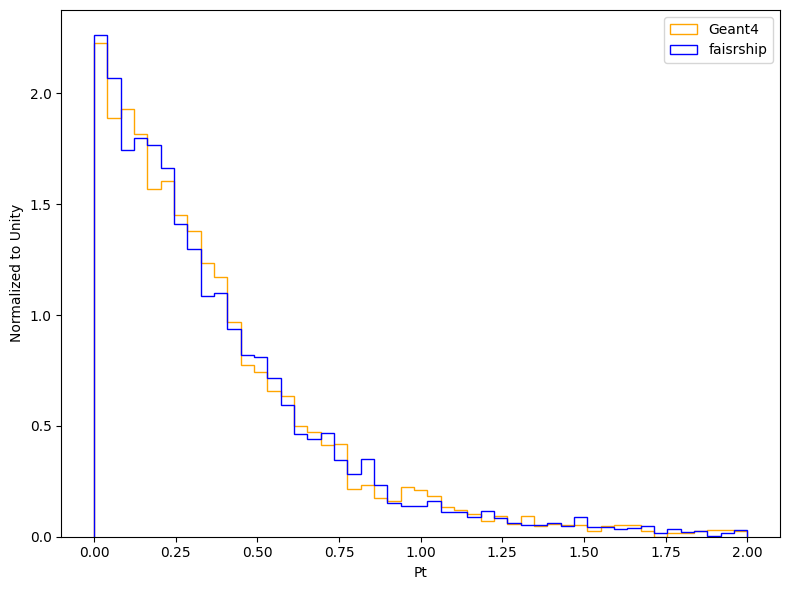

In [17]:
plt.figure(figsize=(8, 6))

# Define bins for the histogram
bins = np.linspace(0, 2, 50)

# Plot the histograms for both ratios (normalized)
plt.hist(y, bins=bins, density=True, histtype='step', label='Geant4', color='orange')
plt.hist(y_fs/100, bins=bins, density=True, histtype='step', label='faisrship', color='blue')

# Add labels and legend
plt.xlabel('Pt')
plt.ylabel('Normalized to Unity')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

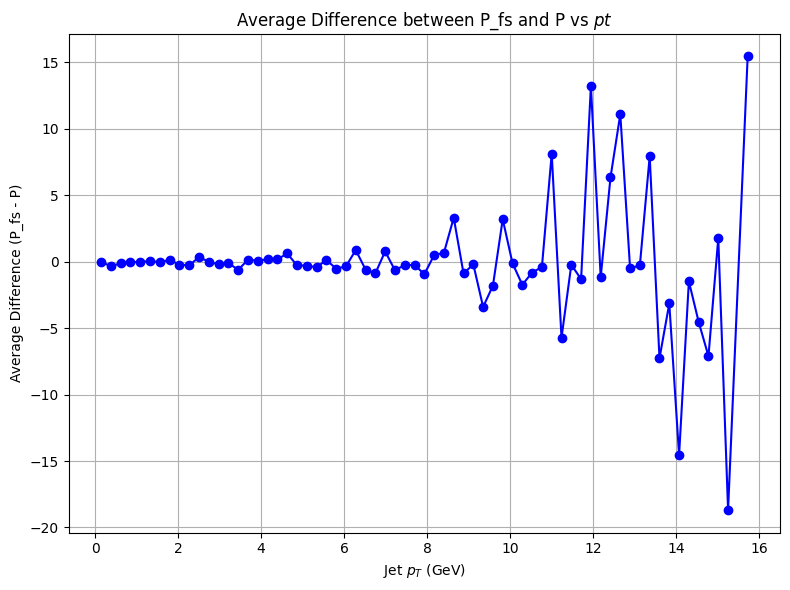

In [18]:
bins = np.histogram_bin_edges(pt, bins='auto')  # Automatically determines the bins based on the data

# Initialize arrays to store the average differences and bin centers
avg_diff = []
bin_centers = []


# Loop over each bin and calculate the average difference between P and P_fs in the corresponding bin
for i in range(len(bins) - 1):
    # Find indices where pt is in the current bin
    mask_pt = (pt >= bins[i]) & (pt < bins[i + 1])
    # Find indices where P_t_fs is in the current bin
    mask_pt_fs = (pt_fs >= bins[i]) & (pt_fs < bins[i + 1])
    
    # Get the corresponding P and P_fs values
    P_in_bin = P[mask_pt]
    P_fs_in_bin = p_fs[mask_pt_fs]
    
    # Calculate the average difference only if there are data points in the bin
    if len(P_in_bin) > 0 and len(P_fs_in_bin) > 0:
        avg_P = np.mean(P_in_bin)
        avg_P_fs = np.mean(P_fs_in_bin)
        avg_diff.append(avg_P_fs - avg_P)
        bin_centers.append((bins[i] + bins[i + 1]) / 2)

# Plot the average difference as a function of pt bin centers
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, avg_diff, marker='o', linestyle='-', color='blue')
plt.xlabel('Jet $p_T$ (GeV)')
plt.ylabel('Average Difference (P_fs - P)')
plt.title('Average Difference between P_fs and P vs $pt$')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()